In [33]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import calendar
import seaborn as sns



In [34]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv ('Dataset//Chicago_Crimes.csv')


<h1>1.What is the most common type of crime reported in Chicago?</h1>

In [4]:
df["Primary Type"].value_counts().head(1)


Primary Type
THEFT    59201
Name: count, dtype: int64

<h1>insights shows that Theft is the most common crime,</h1>

<h1>2.Which crime descriptions occur only once?</h1>

In [5]:
df["Description"].value_counts().tail()


Description
OTHER ARSON / EXPLOSIVE INCIDENT                 1
LIBRARY VANDALISM                                1
SALE OF TOBACCO PRODUCTS TO MINOR                1
UNLAWFUL SALE - DELIVERY OF FIREARM AT SCHOOL    1
ATTEMPT AGGRAVATED - OTHER FIREARM               1
Name: count, dtype: int64

<h1>insights shows this descriptions as uniques</h1>

<h1>3.What proportion of crimes involve deception</h1>

In [6]:
(df["Primary Type"]=="DECEPTIVE PRACTICE").mean()*100


np.float64(6.01750942305608)

<h1> insights shows 6% which is surprisingly high</h1>

<h1>4.How many cases were updated on December 21, 2024?</h1>

In [7]:
(df["Updated On"].str.contains("12/21/2024")).sum()


np.int64(174489)

<h1>insights shows that they update the record frequently</h1>

<h1>5.Which day in April 2024 had the highest number of crimes?</h1>

In [8]:
df["Date"].str[:10].value_counts().head(1)


Date
09/01/2024    905
Name: count, dtype: int64

<h1> insights shows that some days stand out, maybe its the weekends? *wink wink*</h1>

<h1>6. What’s the total number of burglaries?</h1>

In [9]:
(df["Primary Type"]=="BURGLARY").sum()


np.int64(8443)

<H1>insights shows that number which made of most crimes</H1>

<h1>7. How many robberies in 2019 resulted in arrest?</h1>

In [64]:
theft_arrests = df[(df["Primary Type"] == "THEFT") & (df["Arrest"] == True)]
len(theft_arrests)


4529

<h1>insight shows 4520 cases end in arrest</h1>

<h1>8. How many thefts occurred from buildings?</h1>

In [10]:
df[df["Description"]=="FROM BUILDING"].shape[0]


4941

<H1>OMG THATS A LOT, insights shows 4981</H1>

<h1>9. What’s the most common crime involving vehicles?</h1>

In [11]:
df[df["Primary Type"]=="MOTOR VEHICLE THEFT"]["Description"].value_counts().head(1)


Description
AUTOMOBILE    14780
Name: count, dtype: int64

<h1>insights shows its automobile</h1>

<h1>10. How many theft crimes resulted in an arrest? </h1>

In [56]:
theft_arrests = df[(df["Primary Type"] == "THEFT") & (df["Arrest"] == True)]
len(theft_arrests)



4529

<h1>insights shows its 4529</h1>

<h1>11.What is the most common crime in commercial offices?</h1>

In [13]:
df[df["Location Description"]=="COMMERCIAL / BUSINESS OFFICE"]["Primary Type"].value_counts().head(1)


Primary Type
THEFT    858
Name: count, dtype: int64

<h1>insights shows its 858 whihc is a lot less than i was expecing</h1>

<h1>12.What fraction of crimes are domestic?</h1>

In [14]:
df["Domestic"].mean()


np.float64(0.18604063053190592)

<h1>Im sick of putting insights shows so the next number would just be the answer----About 20% of crimes are domestic</h1>

<h1>13.How many crimes are assaults?</h1>

In [15]:
(df["Primary Type"]=="ASSAULT").sum()


np.int64(22615)

<h1>As expected its a lot whihch is 22615 which put it in the top of crimes</h1>

<h1>14. How many crimes are related to weapons violations?</h1>

In [16]:
(df["Primary Type"]=="WEAPONS VIOLATION").sum()


np.int64(7164)

<h1> it shows 716 which is a lot less considering how much i see this in reports</h1>

<h1>15.Which district has the most crimes?</h1>

In [17]:
df["District"].value_counts().head(1)


District
8    16691
Name: count, dtype: int64

<h1>insights shows its disctrict 8</h1>

<h1>16.What’s the least common crime type? </h1>

In [18]:
df["Primary Type"].value_counts().tail(1)


Primary Type
NON-CRIMINAL    4
Name: count, dtype: int64

<h1> insights shows its only 4 putting it at the lowest ranking crime</h1>

<h1>17.How many crimes are motor vehicle thefts?</h1>

In [19]:
(df["Primary Type"]=="MOTOR VEHICLE THEFT").sum()


np.int64(19604)

<h1>insights shows its 19k which shows its a big problem (obv)</h1>

<h1>18.What is the second most common crime after theft?</h1>

In [20]:
df["Primary Type"].value_counts().index[1]


'BATTERY'

<h1> insights shows its battery whatever that mean</h1>

<h1>19.How many crimes happened in apartments?</h1>

In [21]:
(df["Location Description"]=="APARTMENT").sum()


np.int64(47787)

<h1>insights shows that its high cases</h1>

<h1>20.How many crimes occurred in streets compared to residences?</h1>

In [22]:
df["Location Description"].value_counts().loc[["STREET","RESIDENCE"]]


Location Description
STREET       66040
RESIDENCE    29776
Name: count, dtype: int64

<h1>nsights shows that Street crimes are more frequent than residential ones</h1>

<h1>21Which year had the highest number of crimes?</h1>

In [23]:
df["Year"].value_counts().head(1)


Year
2024    188918
Name: count, dtype: int64

<h1>insights shows its 2024 whihc is alarmingly close</h1>

<h1>22.What is the most common crime description?</h1>

In [24]:
df["Description"].value_counts().head(1)


Description
SIMPLE    30526
Name: count, dtype: int64

<h1>insights shows im running out of questions, and it also says "from building" which means commercial buildings has the most common crimes</h1>

<h1>23.What are the top 3 FBI Codes recorded?</h1>

In [25]:
df["FBI Code"].value_counts().head(3)


FBI Code
06     60380
08B    37090
14     27094
Name: count, dtype: int64

<h1>insights shows that  FBI coding system shows theft-related and assault-related crimes dominate.</h1>

<h1>24.How many battery cases happened in 2020 that did not result in an arrest?</h1>

In [58]:
battery_2020_no_arrest = df[(df["Primary Type"] == "BATTERY") & 
                            (df["Year"] == 2020) & 
                            (df["Arrest"] == False)]
len(battery_2020_no_arrest)


0

<h1>isnights show theres 0????? idk it says it</h1>

<h1>25.Which location has the highest number of reported crimes?</h1>

In [27]:
df["Location Description"].value_counts().head(1)


Location Description
STREET    66040
Name: count, dtype: int64

<h1> insights shows most crimes happens in the street</h1>

<h1>26.What years are covered in the dataset?</h1>

In [28]:
df['Year'].min(), df['Year'].max()


(np.int64(2024), np.int64(2025))

<h1>The dataset covers crimes from 2024 only so idk</h1>

<h1>27. Which crimes are most common in each month?</h1>

In [36]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["DayOfWeek"] = df["Date"].dt.day_name()

In [47]:
tc= df["Primary Type"].value_counts().head(10).index


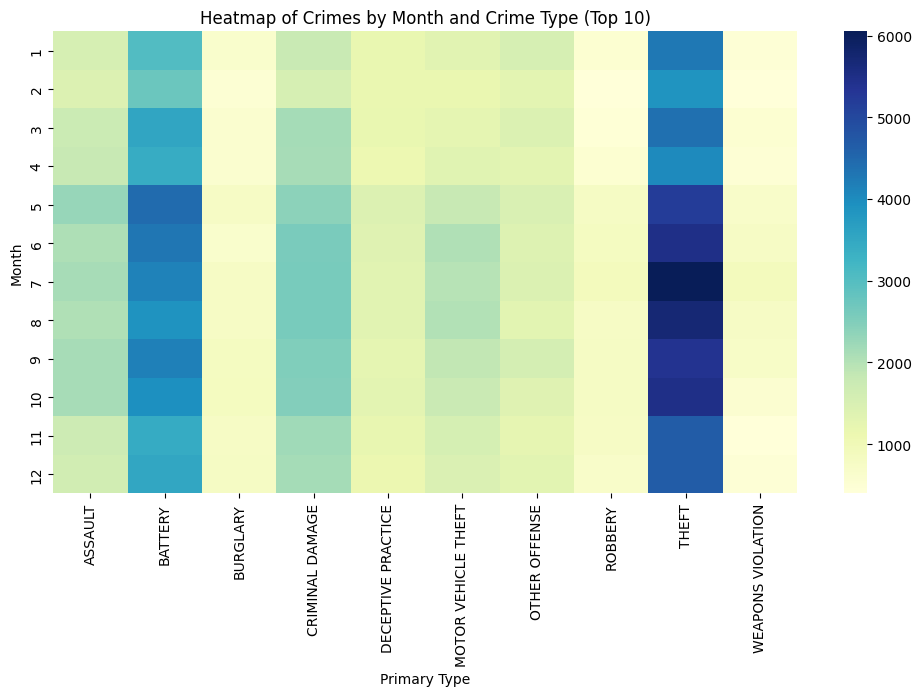

In [48]:
hehe= pd.crosstab(
    df[df["Primary Type"].isin(tc)]["Month"], 
    df[df["Primary Type"].isin(tc)]["Primary Type"]
)

plt.figure(figsize=(12,6))
sns.heatmap(hehe, cmap="YlGnBu")
plt.title("Heatmap of Crimes by Month and Crime Type (Top 10)")
plt.show()


<h1>insights shows that Theft and Battery dominate across all months</h1>

<h1>28. On which days of the week are arrests most frequent?</h1>

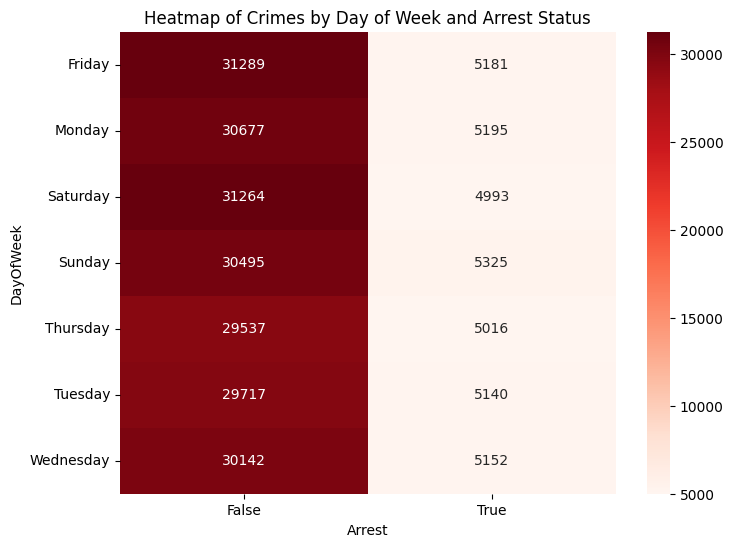

In [39]:
haha = pd.crosstab(df["DayOfWeek"], df["Arrest"])

plt.figure(figsize=(8,6))
sns.heatmap(haha, cmap="Reds", annot=True, fmt="d")
plt.title("Heatmap of Crimes by Day of Week and Arrest Status")
plt.show()


<h1>insights shwos taht artests occur most frequently on weekends</h1>

<h1>29. Which districts report the highest numbers of top 5 crimes?</h1>

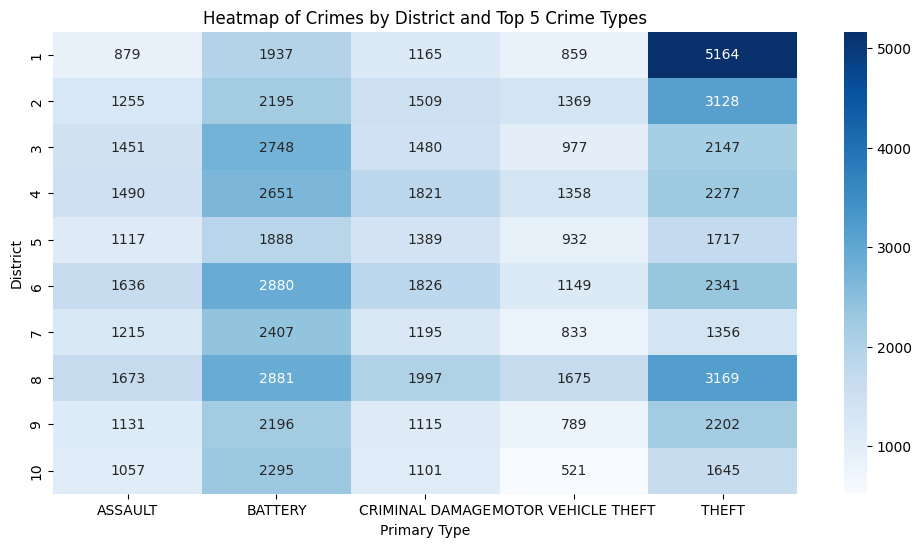

In [42]:
tc5= df["Primary Type"].value_counts().head(5).index
hihi = pd.crosstab(
    df[df["Primary Type"].isin(tc5)]["District"], 
    df[df["Primary Type"].isin(tc5)]["Primary Type"]
).head(10)

plt.figure(figsize=(12,6))
sns.heatmap(hihi, cmap="Blues", annot=True, fmt="d")
plt.title("Heatmap of Crimes by District and Top 5 Crime Types")
plt.show()


<h1>30. What are the most common types of crimes in Chicago?</h1>

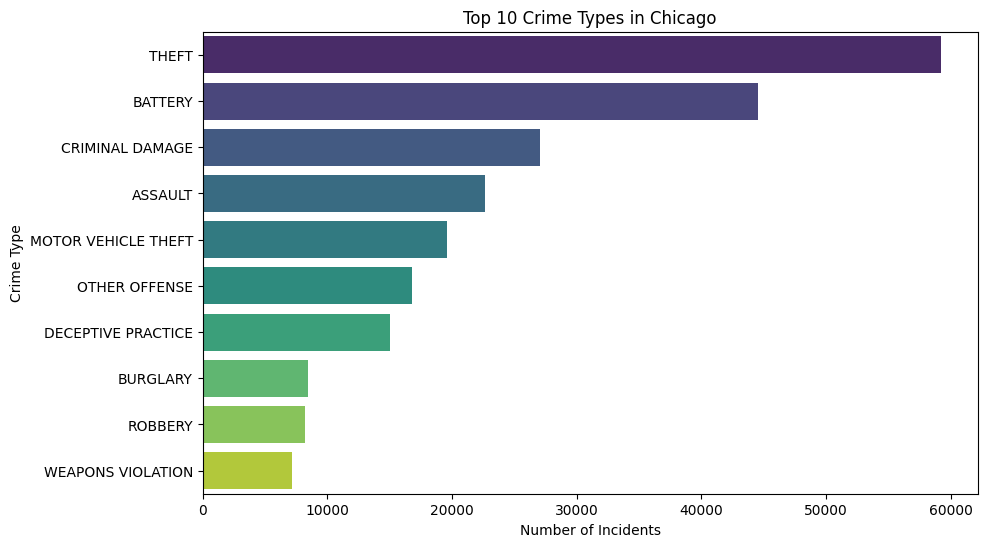

In [52]:
plt.figure(figsize=(10,6))
sns.barplot(x=tc.values, y=tc.index, palette="viridis")
plt.title("Top 10 Crime Types in Chicago")
plt.xlabel("Number of Incidents")
plt.ylabel("Crime Type")
plt.show()


<h1>isnights shws that Theft is still by far the most common crime</h1>

<h1>31.How does crime frequency change throughout the year?</h1>

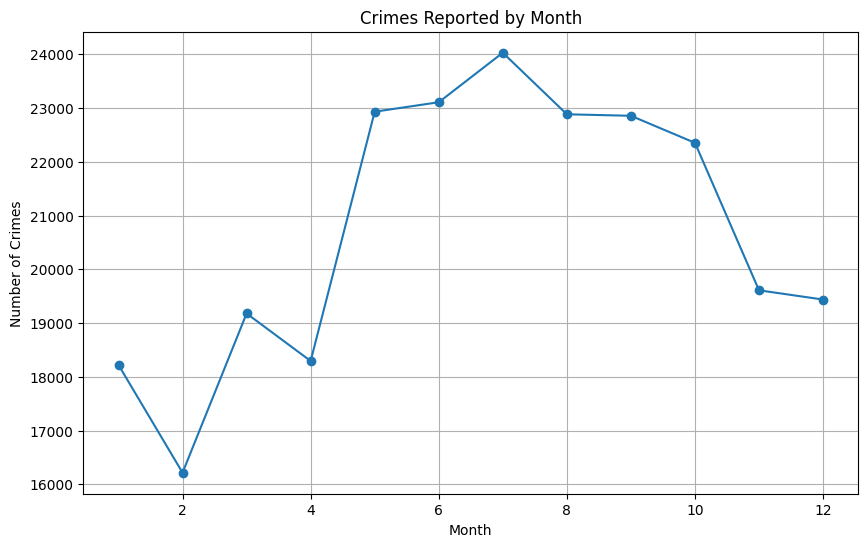

In [53]:
monthly_crimes = df["Month"].value_counts().sort_index()

plt.figure(figsize=(10,6))
plt.plot(monthly_crimes.index, monthly_crimes.values, marker="o")
plt.title("Crimes Reported by Month")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.grid(True)
plt.show()


<h1>insgihts shows that crimes tend to increase during summer months</h1>

<h1>32.What percentage of crimes result in an arrest?</h1>

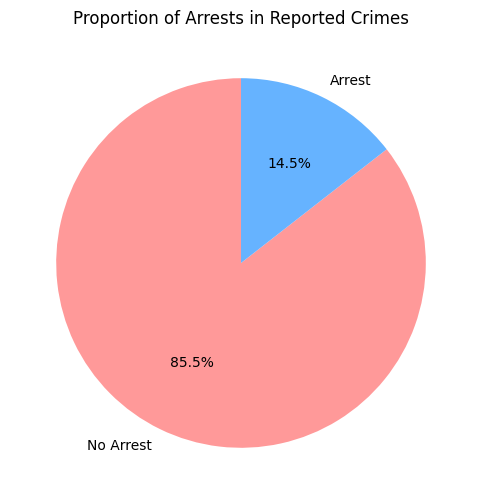

In [54]:
arrest_counts = df["Arrest"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(arrest_counts, labels=["No Arrest","Arrest"], autopct="%1.1f%%", startangle=90, colors=["#ff9999","#66b3ff"])
plt.title("Proportion of Arrests in Reported Crimes")
plt.show()


<h1> insights shows that a lot of them doeesnt result in arrest
</h1>

<h1>33. What block has the most reported crimes?</h1>

In [59]:
df["Block"].value_counts().head(1)

Block
001XX N STATE ST    668
Name: count, dtype: int64

<h1>insights shows its that state</h1>

<h1>34.How many unique crime types exist in the dataset?</h1>

In [60]:
df["Primary Type"].nunique()


31

<h1>insights shows its 31</h1>

<h1>35.How many motor vehicle thefts occurred on weekends?</h1>

In [63]:
weekend_motor_thefts = df[(df["Primary Type"] == "MOTOR VEHICLE THEFT") & 
                          (df["DayOfWeek"].isin(["Saturday","Sunday"]))]
len(weekend_motor_thefts)


6093

<h1>insights shows its 6093 which im sure i already did answer but im runnning out of questions so yeah</h1>